## Team 2  — Car Insurance Prediction Data
#### Members: 
* Abhishek A Deshpande — AXD210163
* Ming-Hsuan Lin — MXL220021
* Rakshit Mathur — RXM210132
* Tasnim Zuhair Al-Smadi — TZA170000
* Syed Muhammad Farzan Hussain — SXH210063
* Vikas Gopalrao Dod — VGD220000

## Objective
The goal of this project is to determine which algorithm to use in order to predict the likelihood that an indiviual will make an insurance claim. 

The following models were evaluated:
* Logistic regression
* Random forest
* Decision trees
* K-nearest neighbors
* Kernel SVM

## Libraries Used

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings

## Exploratory Data Analysis

In [7]:
# Specifying that graphs should be plotted inline
%matplotlib inline 

In [9]:
car2 = pd.read_csv("C:\\Users\\raksh\\OneDrive\\Desktop\\Sem 3\\AML\\Project\\car insurance\\train.csv")

In [10]:
# List of binary columns
binary_cols = ['is_tpms','is_parking_camera','is_brake_assist','is_speed_alert']

for col in binary_cols:

  # Convert Yes/No to 1/0
  car2[col] = car2[col].replace(['Yes','No'], [1,0])

In [11]:
car2['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

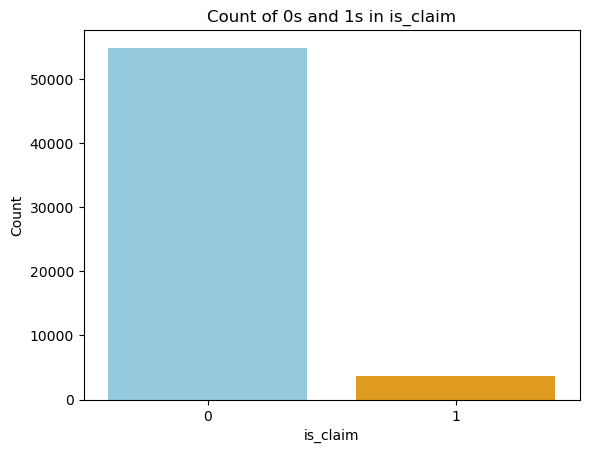

In [12]:
# Assuming car2 is the DataFrame
counts = car2['is_claim'].value_counts()

# Plotting
sns.barplot(x=counts.index, y=counts.values, palette=['skyblue', 'orange'])
plt.title('Count of 0s and 1s in is_claim')
plt.xlabel('is_claim')
plt.ylabel('Count')
plt.show()

The above bar chart shows that there is a data imbalance. There are more entries of people who did not file an insurance claim compared to those people who did. 

In [27]:
# Checking for missing values
print(car2.isna().any())

policy_id                           False
policy_tenure                       False
age_of_car                          False
age_of_policyholder                 False
area_cluster                        False
population_density                  False
make                                False
segment                             False
model                               False
fuel_type                           False
max_torque                          False
max_power                           False
engine_type                         False
airbags                             False
is_esc                              False
is_adjustable_steering              False
is_tpms                             False
is_parking_sensors                  False
is_parking_camera                   False
rear_brakes_type                    False
displacement                        False
cylinder                            False
transmission_type                   False
gear_box                          

There are no missing values in the data.

In [28]:
# Examining the statistics of the dataset
car_age_claim = car2[car2['is_claim'] == 1]
b = np.percentile(car_age_claim['age_of_car'], [5,7,10,25, 50, 75, 95])

print(car_age_claim.describe())
print(b)

       policy_tenure   age_of_car  age_of_policyholder  population_density  \
count    3748.000000  3748.000000          3748.000000         3748.000000   
mean        0.736002     0.063311             0.479966        17623.820438   
std         0.389169     0.053058             0.126140        16130.125259   
min         0.002850     0.000000             0.288462          290.000000   
25%         0.399630     0.020000             0.384615         6112.000000   
50%         0.833247     0.050000             0.461538         8794.000000   
75%         1.084144     0.100000             0.557692        27003.000000   
max         1.335945     0.350000             0.951923        73430.000000   

              make      airbags      is_tpms  is_parking_camera  displacement  \
count  3748.000000  3748.000000  3748.000000        3748.000000   3748.000000   
mean      1.761740     3.156617     0.240395           0.389007   1170.177161   
std       1.139372     1.840379     0.427380          

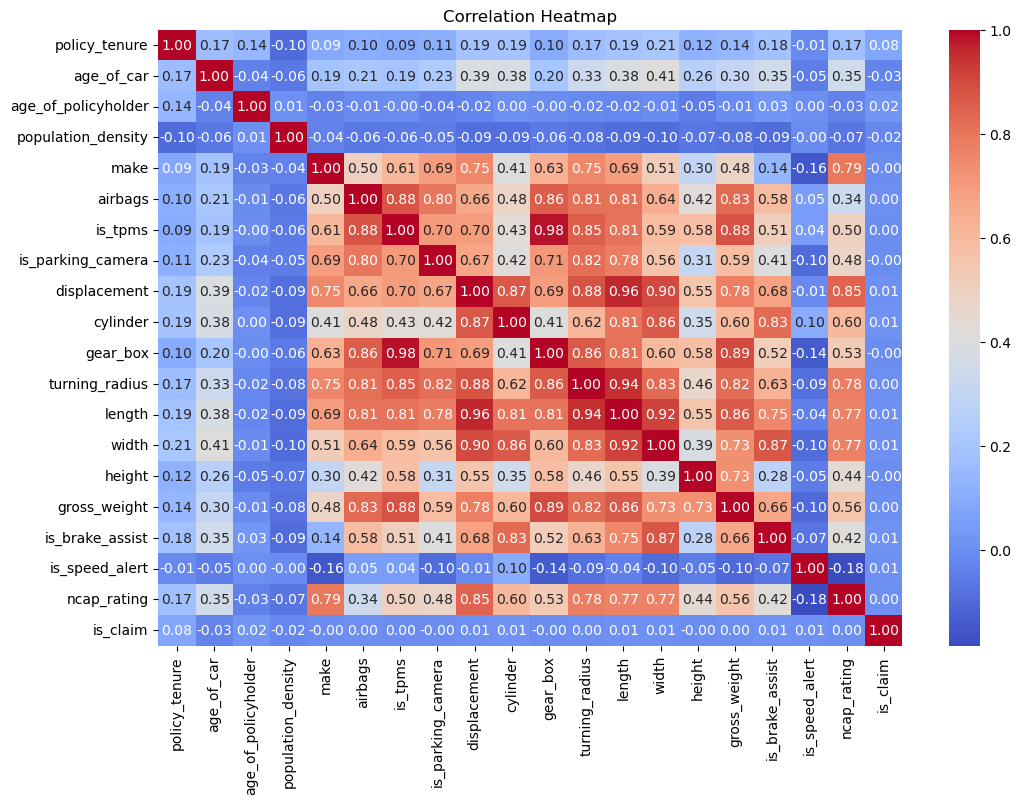

In [29]:
# Calculating the correlation matrix
correlation_matrix = car2.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size (adjust as needed)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Setting the title 
plt.title("Correlation Heatmap")

# Displaying the heatmap
plt.show()

Since the data is unbalanced, we need to apply resampling methods for accurate predictions.

## Data Cleaning

In [13]:
# Defining X and Y 
# The X variables used are those factors that have a higher correlation
car_X_new = car2[['policy_tenure','age_of_car','age_of_policyholder','displacement', 'make','airbags',
                             'is_parking_camera', 'length', 'height', 'is_speed_alert','is_brake_assist', 'ncap_rating']]

car_y_new = car2[['is_claim']]

# Initiating SMOTEENN for sampling
smt = SMOTEENN(random_state=0)

# Generating the resampled data
X_res, y_res = smt.fit_resample(car_X_new, car_y_new)

y_res.value_counts()

is_claim
1           41203
0           33768
dtype: int64

The data is now relatively balanced. 

## _I have added this:_ CROSSCHECK (Farzan)

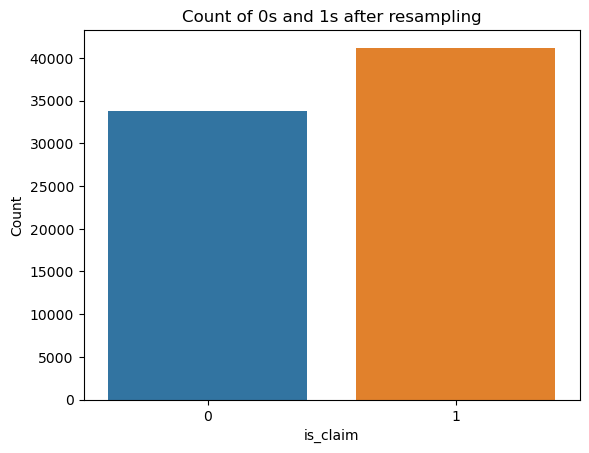

In [31]:
# Extracting resampled is_claim column as a series
y_res_series = y_res.squeeze()

# Vizualizing using a barplot
sns.countplot(x = y_res_series)
plt.title('Count of 0s and 1s after resampling')
plt.xlabel('is_claim')
plt.ylabel('Count')
plt.show()

# _Original code_ (Farzan)

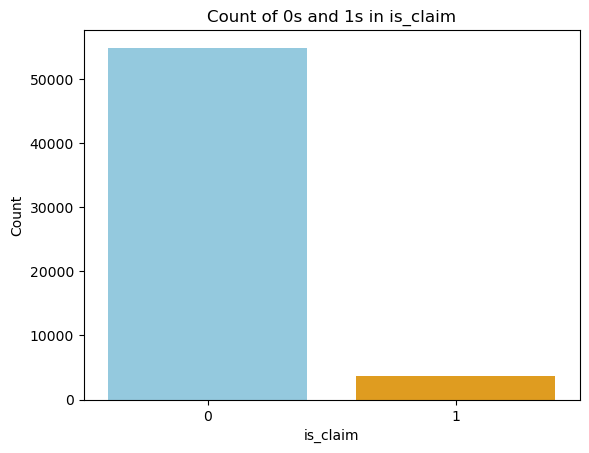

In [32]:
# Assuming car2 is your DataFrame
counts = car2['is_claim'].value_counts()

# Plotting
sns.barplot(x=counts.index, y=counts.values, palette=['skyblue', 'orange'])
plt.title('Count of 0s and 1s in is_claim')
plt.xlabel('is_claim')
plt.ylabel('Count')
plt.show()

In [14]:
# Data splitting and checking sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)
print(np.mean(y_train), np.mean(y_res))

# we need a comparable portion of 1s for y

is_claim    0.547476
dtype: float64 is_claim    0.549586
dtype: float64


C:\Users\raksh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Logistic Regression

In [15]:
# Initiating logistic regression
logreg = LogisticRegression(random_state=0)

# Fitting the data
logreg.fit(X_train, y_train)

# Finding the coefficient and intercept
print(logreg.coef_)
print(logreg.intercept_)

# Determining model accuracy
print("Test Accuracy is:", logreg.score(X_test, y_test))

y_test_pred = logreg.predict(X_test)

C:\Users\raksh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 1.32993574e+00 -2.51785008e-01  1.46595539e-01  9.14394767e-04
   4.36889723e-02 -1.58690994e-02 -1.49727233e-01  2.26863078e-05
  -1.01459613e-03  5.01057505e-02 -9.72318905e-02 -1.67028103e-01]]
[0.00860783]
Test Accuracy is: 0.6308465232082519


C:\Users\raksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Generating a confusion matrix
my_matrix = confusion_matrix(y_test, y_test_pred)
print(my_matrix)

[[5298 4722]
 [3581 8891]]


In [17]:
# Checking the number of correctly and incorrectly classified entries
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 8891
TN is: 5298
FP is: 4722
FN is: 3581


In [18]:
# Evaluating model performance
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.6531256886799383
Recall score: 0.7128768441308531
Accuracy score: 0.6308465232082519
F1 score: 0.6816944604178645


Text(0, 0.5, 'Precision')

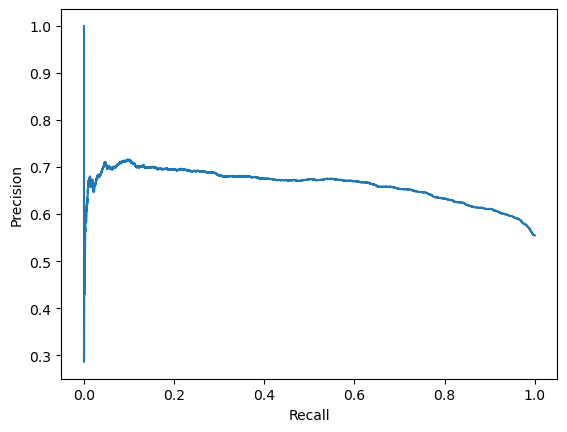

In [38]:
# Obtaining the probability: getting pi-hats
pred_prob = logreg.predict_proba(X_test)[:,1]

logreg.predict_proba(X_test).shape # 2 columns: [prob_y=0, prob_y=1]
# to get pi-hat, all records, but second column (column index = 1): [ : , 1]

# Collecting necessary measures
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

# Plotting the Precision-Recall Curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [39]:

# we have obtained the predicted probability in the previous step: y_pred_proba

print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob))

AUC for logistic regression: 0.6542052601019898


Text(0, 0.5, 'TPR')

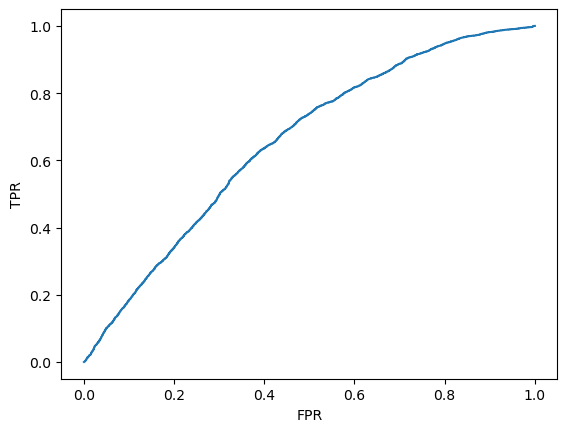

In [40]:
# Predicted Probability: pred_proba
# Getting measures
FPR, TPR, threshold = roc_curve(y_test, pred_prob)

# Generating figure
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

The above graphs and the area under the curve show that the model performance is not ideal for making predictions. The next step is to apply GridSearchCV to determine if the performance can be improved.

In [19]:
# Initiating the model
final_logreg = LogisticRegression()

# Defining hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear','sag','saga']} 

# Defining cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Setting up grid search
grid_search = GridSearchCV(final_logreg, param_grid, cv=cv, scoring='roc_auc', n_jobs=2)

# Fitting grid search
warnings.filterwarnings('ignore')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='roc_auc')

In [20]:
grid_search.best_params_, grid_search.best_score_

({'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.6647773713425474)

In [21]:
final_logreg = LogisticRegression(C= 0.1, penalty= 'l1', solver= 'liblinear', random_state=0)

# Fitting the data
final_logreg.fit(X_train, y_train)

# Obtaining the coefficients
print(final_logreg.coef_)
print(final_logreg.intercept_)

# Finding the accuracy
print("Test Accuracy is:", final_logreg.score(X_test, y_test))

[[ 1.35734713e+00 -5.62930856e+00  2.25248508e-01  1.29841206e-03
  -1.05780651e-01 -1.01491368e-03 -1.13859545e-01  2.13148453e-06
  -1.01014961e-03  0.00000000e+00 -1.17723770e-01 -4.94156457e-02]]
[0.]
Test Accuracy is: 0.6320914102792103


In [22]:
# Getting the prediction
y_test_pred = logreg.predict(X_test)
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix

array([[5298, 4722],
       [3581, 8891]], dtype=int64)

Text(0, 0.5, 'Precision')

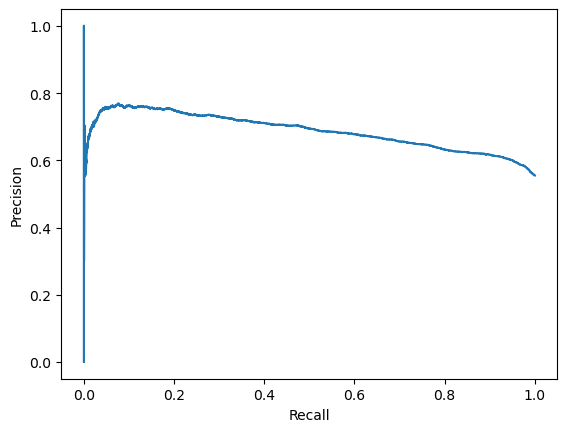

In [23]:
# Plotting the Precision-Recall Curve for the Grid Search
# S1. Get probability: getting pi-hats
pred_prob = final_logreg.predict_proba(X_test)[:,1]

final_logreg.predict_proba(X_test).shape # 2 columns: [prob_y=0, prob_y=1]
# to get pi-hat, all records, but second column (column index = 1): [ : , 1]

# S2. Collect Necessary Measures: 3 outputs
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)
# precision, recall = precision_recall_curve(y_test, pred_prob)

# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [63]:

# we have obtained the predicted probability in the previous step: y_pred_proba

print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob))

AUC for logistic regression: 0.672420513367108


Text(0, 0.5, 'TPR')

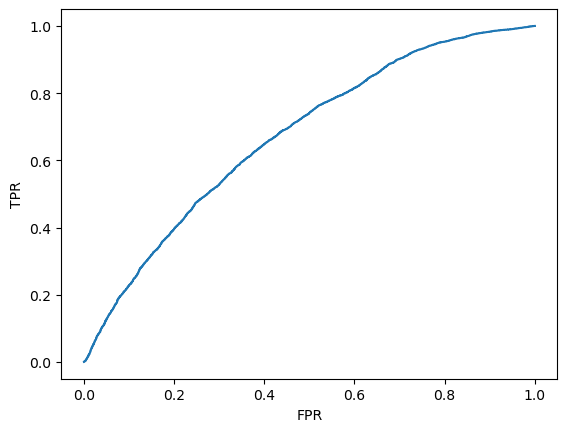

In [64]:
# Precision-Recall Curve
# Predicted Probability: pred_proba
# Get Measures
FPR, TPR, threshold = roc_curve(y_test, pred_prob)

# Generate Figure
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

# Random Forest

In [53]:
# Initiating random the random forest classifier
classifier = RandomForestClassifier(random_state=0)

# Fitting the data
classifier.fit(X_train,y_train)

# Predicting outcome
preds = classifier.predict(X_test)

# Determining the accuracy
print("RF accuracy:", accuracy_score(y_test,preds))

/var/folders/b2/z8wgx_jn70d7rxk55d2m1m000000gn/T/ipykernel_29813/3317526553.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RF accuracy: 0.9639871954472702


In [54]:
# Generating a confusion matrix
my_matrix = confusion_matrix(y_test, preds)

# Determining classification
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])
print(my_matrix)

TP is: 12048
TN is: 9634
FP is: 386
FN is: 424
[[ 9634   386]
 [  424 12048]]


In [55]:
# Generating performance measures
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.9295785804816223
Recall score: 0.9409076330981399
Accuracy score: 0.9277076293793348
F1 score: 0.9352087982148549


## _I have added this:_ CROSSCHECK (Farzan)

Text(0, 0.5, 'Precision')

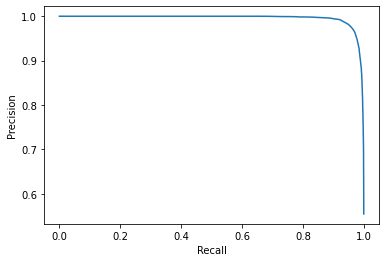

In [142]:
pred_prob = classifier.predict_proba(X_test)[:,1]

# Collecting necessary measures
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

# Plotting precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

AUC for random forest classifier: 0.9936772942248919


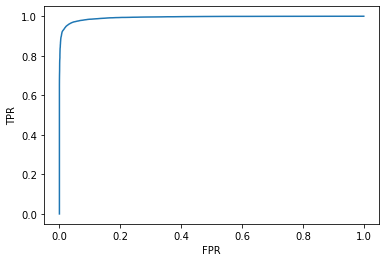

In [143]:
# Predicted Probability: pred_proba
# Get Measures
FPR, TPR, threshold = roc_curve(y_test, pred_prob)

# Generating the figure
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

print("AUC for random forest classifier:", roc_auc_score(y_test, pred_prob)  )

## Decision Tree

In [49]:
# Creating a full decision tree
dt_full = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Fitting the tree
dt_full.fit(X_train, y_train)

# Obtaining the training and test score
print("Training score:", dt_full.score(X_train, y_train), "\nTest_score:", 
      dt_full.score(X_test, y_test))

Training score: 1.0 
Test_score: 0.9277076293793348


In [50]:
# Inspecting feature importance
print(dt_full.feature_importances_)

[2.47668143e-01 4.62217554e-01 1.88608558e-01 1.50713014e-02
 9.15223872e-03 7.51918826e-03 5.29940794e-03 1.93815541e-02
 2.95876704e-02 3.94600150e-04 5.98009116e-03 9.11969298e-03]


In [51]:
# Obtaining y_test_pred
y_test_pred = dt_full.predict(X_test)

# Generating a confusion matrix
tree_matrix = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print("TP is:", tree_matrix[1,1])
print("TN is:", tree_matrix[0,0])
print("FP is:", tree_matrix[0,1])
print("FN is:", tree_matrix[1,0])

# Calculating performance measures
print('\nPrecision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Confusion Matrix:
TP is: 11735
TN is: 9131
FP is: 889
FN is: 737

Precision score: 0.9295785804816223
Recall score: 0.9409076330981399
Accuracy score: 0.9277076293793348
F1 score: 0.9352087982148549


## _I have added this:_ CROSSCHECK (Farzan)

Text(0, 0.5, 'Precision')

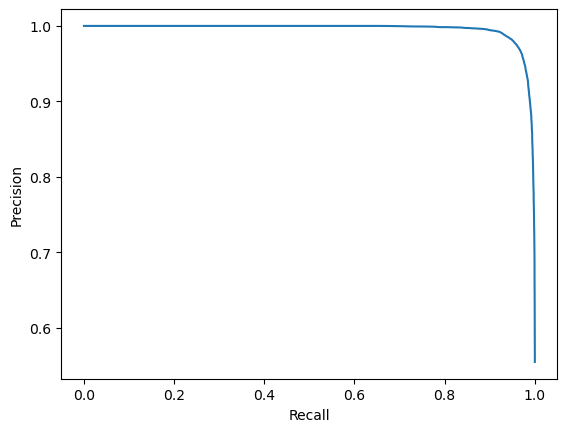

In [56]:
pred_prob = classifier.predict_proba(X_test)[:,1]

# Collecting necessary measures
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

# Plotting precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

AUC for decision tree: 0.9936772942248919


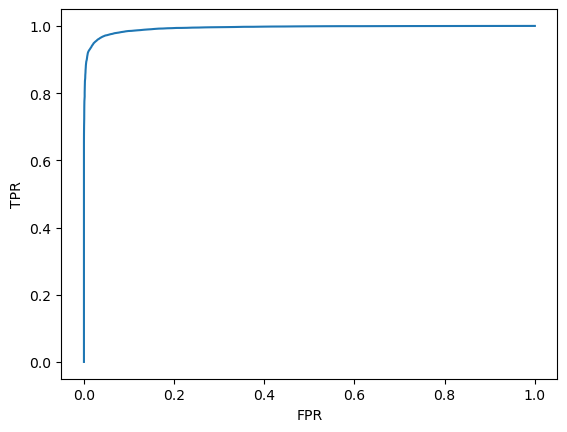

In [57]:
# Predicted Probability: pred_proba
# Get Measures
FPR, TPR, threshold = roc_curve(y_test, pred_prob)

# Generating the figure
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

print("AUC for decision tree:", roc_auc_score(y_test, pred_prob))

## K-Nearest Neighbors

In [151]:
# Initiating K-NN with 3 neighbors to use as a baseline
np.random.seed(0)
knn3 = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [152]:
# Predictions
y_test_pred = knn3.predict(X_test)

# Accuracy score for training and test set
print("The accuracy of the training set is:", knn3.score(X_train, y_train),
      "\nThe accuracy of the test set is:", knn3.score(X_test, y_test))

The accuracy of the training set is: 0.9901103298462242 
The accuracy of the test set is: 0.9661657478214476


### Hyperparameter Tuning
The next step is determining how many neighbors would yield the best accuracy.

In [153]:
# Initiating knn
knn = KNeighborsClassifier()

# Starting from a range of 3 to a max value of 51 neighbors. Incrementing by 2 to obtain odd numbers
param_knn = {'n_neighbors': range(3, 51, 2)} 

# Applying GridSearch with 10 fold cross-validation
grid_knn = GridSearchCV(knn, param_knn, cv = 10)

# Fitting the data
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 51, 2)})

In [154]:
# Best hyperparameter:
print("The best number of neighbors is:", grid_knn.best_params_, "with an accuracy of:", grid_knn.best_score_)

The best number of neighbors is: {'n_neighbors': 3} with an accuracy of: 0.9580021989917584


In [155]:
# Getting the predicted output based on the best value of n_neighbors
y_test_pred = knn3.predict(X_test)

In [156]:
# Creating a confusion matrix
my_matrix = (confusion_matrix(y_test, y_test_pred))
print(my_matrix)

[[ 9328   692]
 [   69 12403]]


In [157]:
# Classifications
print("True positives:", my_matrix[1][1])
print("True negatives:", my_matrix[0][0])
print("False positives:", my_matrix[0][1])
print("False negatives:", my_matrix[1][0])

True positives: 12403
True negatives: 9328
False positives: 692
False negatives: 69


In [158]:
# Evaluating performance
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.9471554028255059
Recall score: 0.9944676074406671
Accuracy score: 0.9661657478214476
F1 score: 0.9702350686431728


Text(0, 0.5, 'Precision')

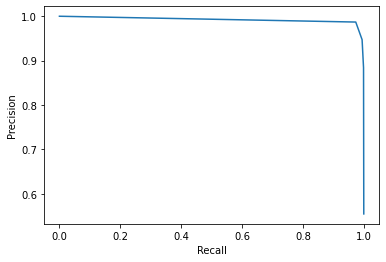

In [159]:
# Predicting outcome probabilities
pred_prob = grid_knn.predict_proba(X_test)[:,1]

# Collecting necessary measures
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

# Plotting precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

AUC for K-NN: 0.9902747623739052


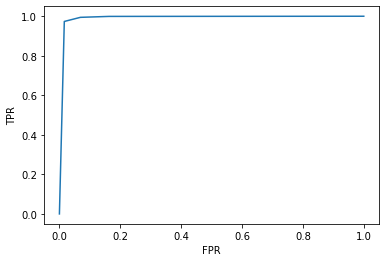

In [160]:
# Get Measures
FPR, TPR, threshold = roc_curve(y_test, pred_prob)

# Generating the figure
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

print("AUC for K-NN:", roc_auc_score(y_test, pred_prob)  )

The area under the curve for K-NN is high, indicating excellent model performance for predictions.

## SVM

In [162]:
# Initiating LinearSVC
linear_svc = LinearSVC(random_state = 0)

# Defining parameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] }

# Running GridSearch
grid_lrsvc = GridSearchCV(linear_svc, params_svc, n_jobs = 2)

# Fitting the model
grid_lrsvc.fit(X_train, y_train)

/Users/farzanhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/farzanhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/farzanhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/farzanhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/farzanhussain/opt/anaconda3/lib/python3

GridSearchCV(estimator=LinearSVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000]})

In [163]:
# Finding the best parameters
grid_lrsvc.best_params_

{'C': 0.001}

In [164]:
# Linear SVC with Best Parameters (C = 0.001)
lr_svc = LinearSVC(C = 0.001, random_state = 0) 

# Fitting the data
lr_svc.fit(X_train, y_train)

# Obtaining the accuracy
print("Training accuracy:", lr_svc.score(X_train, y_train), 
      "\nTest accuracy:", lr_svc.score(X_test, y_test))

Training accuracy: 0.5474761333104671 
Test accuracy: 0.5545082696069714


In [165]:
# Obtaining predicted outcomes
y_test_pred = lr_svc.predict(X_test)

In [166]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.5545082696069714
Recall score: 1.0
Accuracy score: 0.5545082696069714
F1 score: 0.7134195172177097


## _I have added this:_ CROSSCHECK (Farzan)

The AUC is: 0.5993426232845406 which is slightly better than flipping a coin.


Text(0, 0.5, 'Precision')

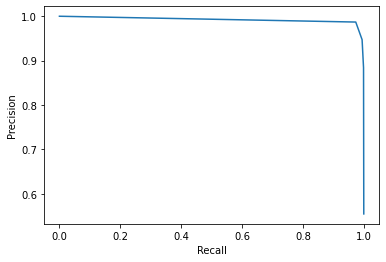

In [175]:
# Predicting outcomes
y_pred = lr_svc.decision_function(X_test)

# Collecting necessary measures
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC
print("The AUC is:", roc_auc_score(y_test, y_pred), "which is slightly better than flipping a coin.")

# Plotting precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

Low AUC means that this model may not be ideal for predictions.